In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import AutoTokenizer, AutoModel
from gensim.models import KeyedVectors
from build_features_utils import *

In [ ]:
# Sample Corpus with Sentiment Labels
corpus = [
    {"text_clean": "movie terrible waste of time", "target": 0},
    {"text_clean": "absolutely love food best restaurant", "target": 4},
    {"text_clean": "product broke after one week", "target": 0},
    {"text_clean": "amazing customer service highly recommend", "target": 4},
    {"text_clean": "hotel dirty staff rude", "target": 0},
    {"text_clean": "game fantastic graphics smooth gameplay", "target": 4},
    {"text_clean": "delivery slow package arrived late", "target": 0},
    {"text_clean": "phone excellent camera battery life", "target": 4},
    {"text_clean": "laptop crash often not worth buying", "target": 0},
    {"text_clean": "experience wonderful staff friendly helpful", "target": 4},
    {"text_clean": "poor quality product waste of money", "target": 0},
    {"text_clean": "service was great staff very polite", "target": 4},
    {"text_clean": "game crashes constantly not worth playing", "target": 0},
    {"text_clean": "food delicious best meal ever", "target": 4},
    {"text_clean": "hotel room small uncomfortable", "target": 0},
    {"text_clean": "outstanding customer support very satisfied", "target": 4},
    {"text_clean": "item defective do not buy", "target": 0},
    {"text_clean": "love the design of this product", "target": 4},
    {"text_clean": "slow response times very frustrating", "target": 0},
    {"text_clean": "great experience highly recommended", "target": 4},
    {"text_clean": "unresponsive customer service no help", "target": 0},
    {"text_clean": "nice ambiance friendly staff", "target": 4},
    {"text_clean": "package arrived damaged poor packaging", "target": 0},
    {"text_clean": "product works as expected highly recommend", "target": 4},
    {"text_clean": "website confusing hard to navigate", "target": 0},
    {"text_clean": "excellent value for the price", "target": 4},
    {"text_clean": "poor customer service no answers", "target": 0},
    {"text_clean": "loved every part of this experience", "target": 4},
    {"text_clean": "horrible experience will not return", "target": 0},
    {"text_clean": "amazing performance worth every penny", "target": 4},
    {"text_clean": "product didn't meet expectations disappointing", "target": 0},
    {"text_clean": "this phone is a game changer", "target": 4},
    {"text_clean": "very bad quality broke after one day", "target": 0},
    {"text_clean": "top notch quality will buy again", "target": 4},
    {"text_clean": "the software is very buggy and unreliable", "target": 0},
    {"text_clean": "absolutely flawless excellent performance", "target": 4},
    {"text_clean": "took too long to ship very disappointed", "target": 0},
    {"text_clean": "quick delivery and amazing quality", "target": 4},
    {"text_clean": "the product was defective on arrival", "target": 0},
    {"text_clean": "fantastic product would recommend to anyone", "target": 4},
    {"text_clean": "the customer support was unhelpful and rude", "target": 0},
    {"text_clean": "will definitely be coming back very pleased", "target": 4},
    {"text_clean": "the restaurant was filthy food was bad", "target": 0},
    {"text_clean": "had a great time here fantastic food and service", "target": 4},
    {"text_clean": "this item was not as described not satisfied", "target": 0},
    {"text_clean": "this service is impeccable highly recommend", "target": 4},
    {"text_clean": "very disappointing experience not what I expected", "target": 0},
    {"text_clean": "would buy again in a heartbeat excellent quality", "target": 4},
    {"text_clean": "the game is glitchy and frustrating", "target": 0},
    {"text_clean": "unforgettable experience great staff and service", "target": 4},
    {"text_clean": "very unprofessional staff will not return", "target": 0},
    {"text_clean": "amazing food great vibe loved everything", "target": 4},
    {"text_clean": "product arrived broken completely useless", "target": 0},
    {"text_clean": "service was fantastic food was delicious", "target": 4}
]




In [31]:
# Convert to DataFrame
df = pd.DataFrame(corpus)


In [24]:
df.head()

,text_clean,target
0,movie terrible waste of time,0
1,absolutely love food best restaurant,4
2,product broke after one week,0
3,amazing customer service highly recommend,4
4,hotel dirty staff rude,0


In [42]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df["text_clean"], df["target"], test_size=0.2, random_state=42)

# Print lengths of splits
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training labels size: {len(y_train)}")
print(f"Test labels size: {len(y_test)}")

# List of feature extraction methods
feature_methods = ["tfidf", "count", "binary_count", "word2vec", "glove", "bert"]

# Dictionary to store results
results = {}

Training set size: 43
Test set size: 11
Training labels size: 43
Test labels size: 11



🔍 Processing feature extraction using: tfidf...
✅ tfidf - X_train_features shape: (43, 137)
✅ tfidf - X_test_features shape: (11, 137)
✅ tfidf - Accuracy: 0.8182


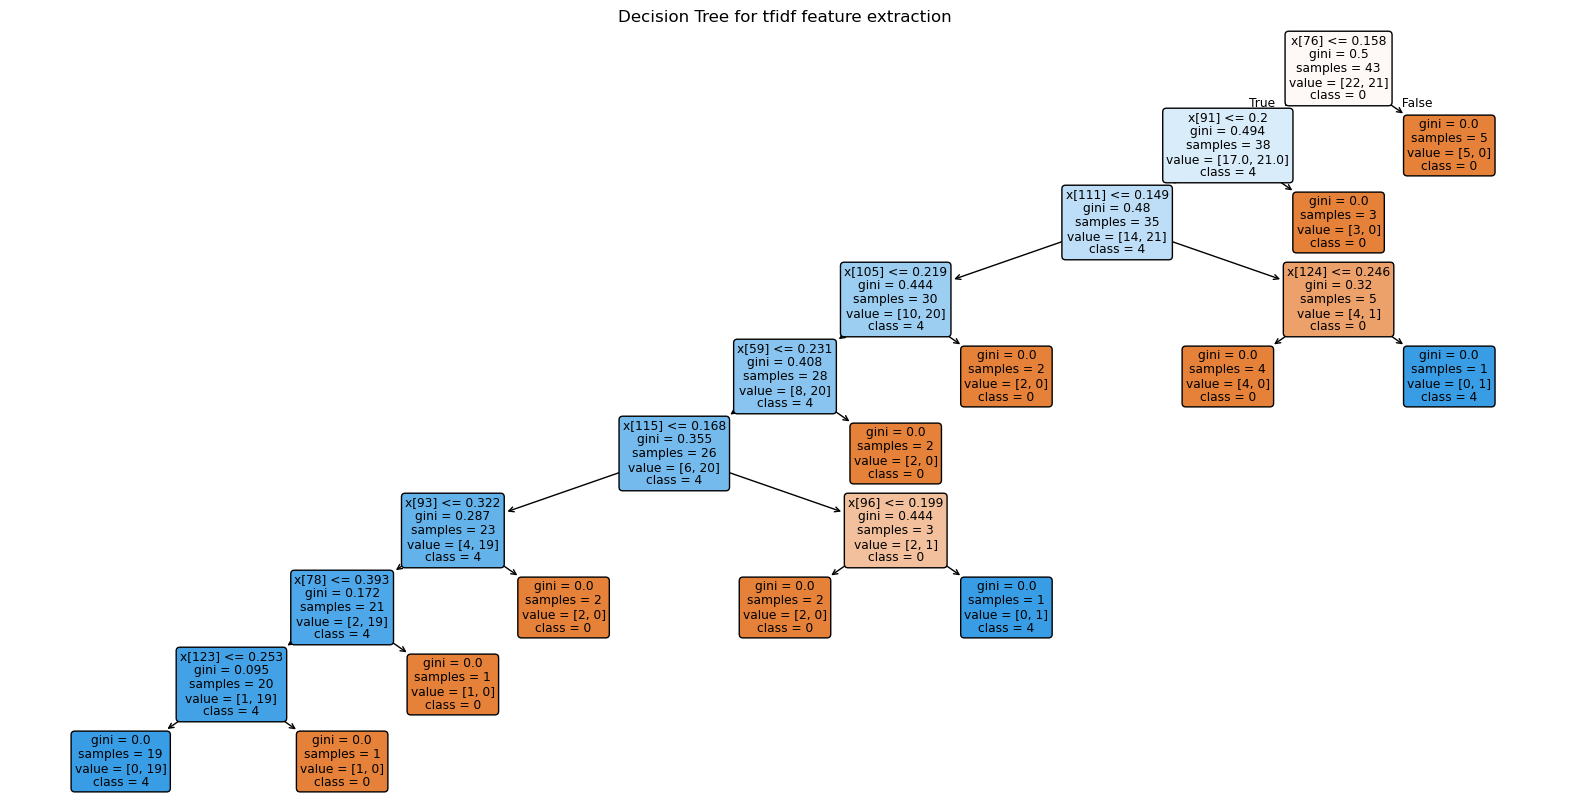


Rules used to predict sample 0:
decision node 0 : (X_test[0, 76] = 0.0) <= 0.15816843509674072
decision node 1 : (X_test[0, 91] = 0.0) <= 0.19996489584445953
decision node 2 : (X_test[0, 111] = 0.0) <= 0.14903800189495087
decision node 3 : (X_test[0, 105] = 0.0) <= 0.21859019994735718
decision node 4 : (X_test[0, 59] = 0.0) <= 0.2307213395833969
decision node 5 : (X_test[0, 115] = 0.0) <= 0.16828587651252747
decision node 6 : (X_test[0, 93] = 0.0) <= 0.3222910463809967
decision node 7 : (X_test[0, 78] = 0.0) <= 0.3934849500656128
decision node 8 : (X_test[0, 123] = 0.0) <= 0.25334253907203674

The following samples [0, 1] share the node(s) [0 1 2 3 4 5 6 7 8 9] in the tree.
This is 43.47826086956522% of all nodes.

🔍 Processing feature extraction using: count...
✅ count - X_train_features shape: (43, 137)
✅ count - X_test_features shape: (11, 137)
✅ count - Accuracy: 0.8182


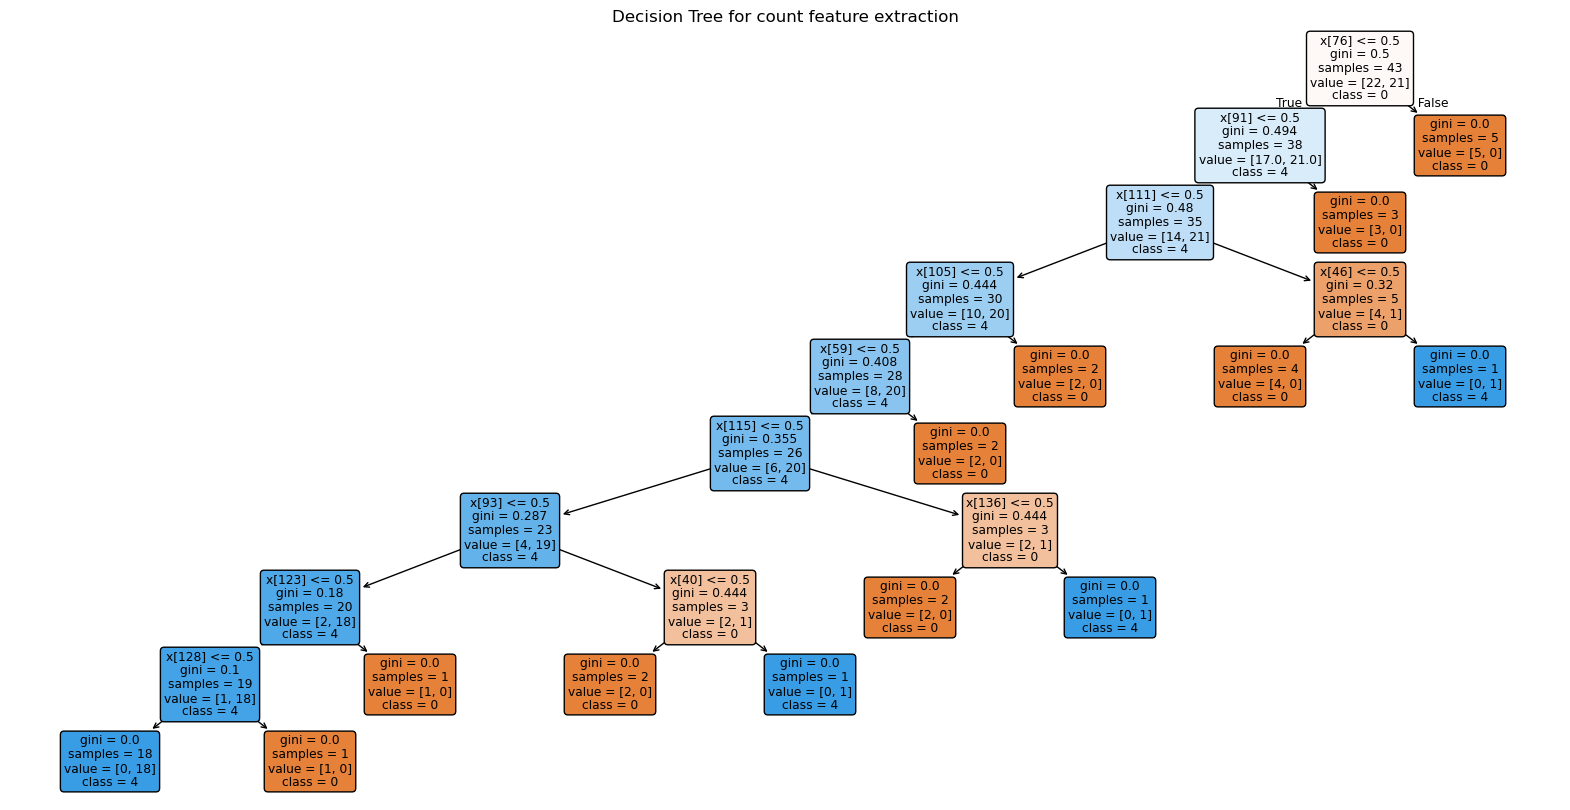


Rules used to predict sample 0:
decision node 0 : (X_test[0, 76] = 0) <= 0.5
decision node 1 : (X_test[0, 91] = 0) <= 0.5
decision node 2 : (X_test[0, 111] = 0) <= 0.5
decision node 3 : (X_test[0, 105] = 0) <= 0.5
decision node 4 : (X_test[0, 59] = 0) <= 0.5
decision node 5 : (X_test[0, 115] = 0) <= 0.5
decision node 6 : (X_test[0, 93] = 0) <= 0.5
decision node 7 : (X_test[0, 123] = 0) <= 0.5
decision node 8 : (X_test[0, 128] = 0) <= 0.5

The following samples [0, 1] share the node(s) [0 1 2 3 4 5 6 7 8 9] in the tree.
This is 40.0% of all nodes.

🔍 Processing feature extraction using: binary_count...
✅ binary_count - X_train_features shape: (43, 137)
✅ binary_count - X_test_features shape: (11, 137)
✅ binary_count - Accuracy: 0.8182


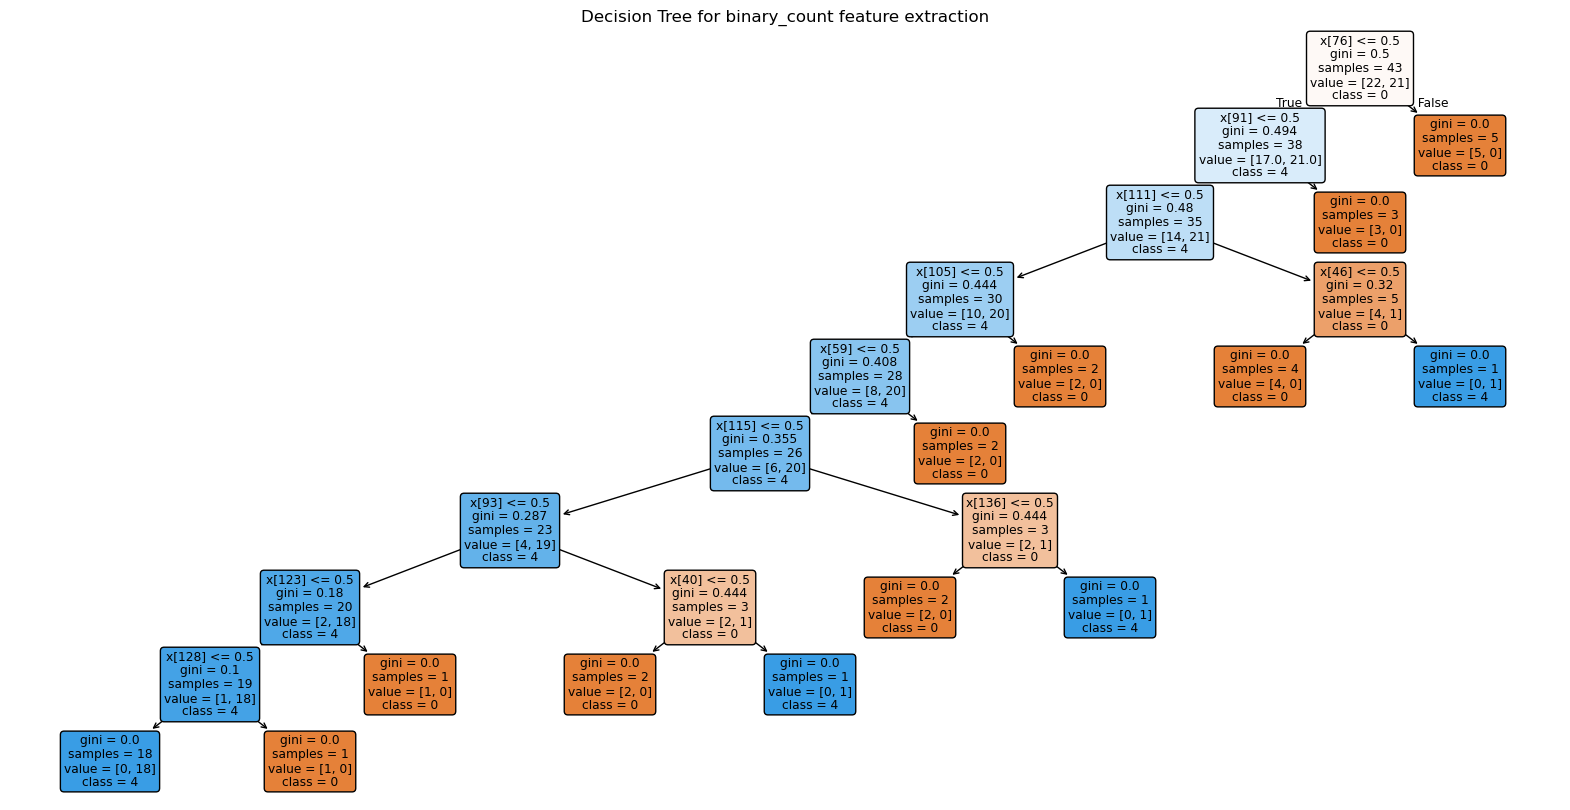


Rules used to predict sample 0:
decision node 0 : (X_test[0, 76] = 0) <= 0.5
decision node 1 : (X_test[0, 91] = 0) <= 0.5
decision node 2 : (X_test[0, 111] = 0) <= 0.5
decision node 3 : (X_test[0, 105] = 0) <= 0.5
decision node 4 : (X_test[0, 59] = 0) <= 0.5
decision node 5 : (X_test[0, 115] = 0) <= 0.5
decision node 6 : (X_test[0, 93] = 0) <= 0.5
decision node 7 : (X_test[0, 123] = 0) <= 0.5
decision node 8 : (X_test[0, 128] = 0) <= 0.5

The following samples [0, 1] share the node(s) [0 1 2 3 4 5 6 7 8 9] in the tree.
This is 40.0% of all nodes.

🔍 Processing feature extraction using: word2vec...
✅ word2vec - X_train_features shape: (43, 300)
✅ word2vec - X_test_features shape: (11, 300)
✅ word2vec - Accuracy: 0.7273


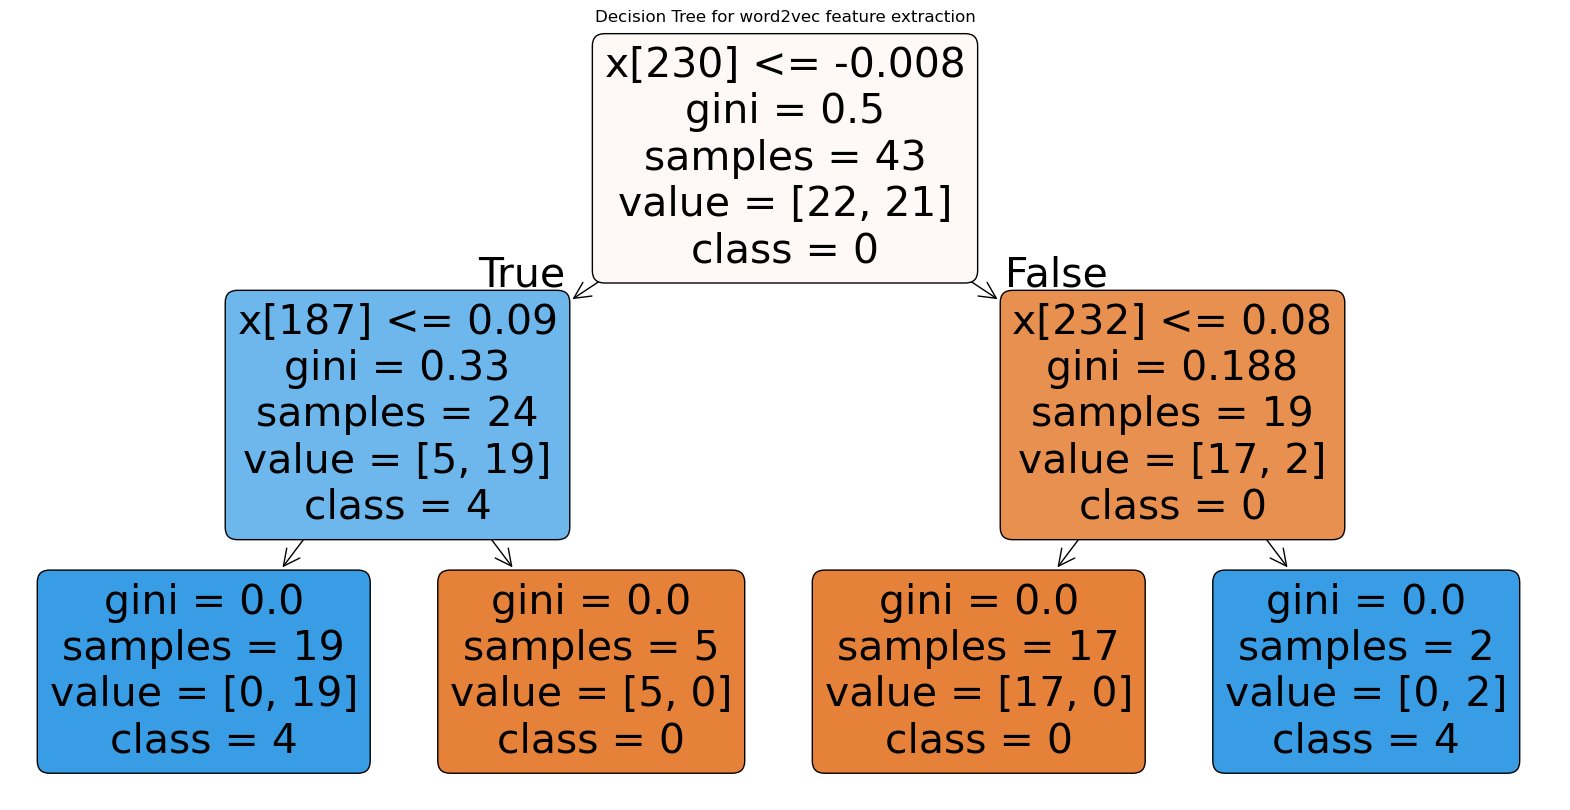


Rules used to predict sample 0:
decision node 0 : (X_test[0, 230] = -0.145477294921875) <= -0.007627577753737569
decision node 1 : (X_test[0, 187] = -0.11688232421875) <= 0.08964786678552628

The following samples [0, 1] share the node(s) [0 1 2] in the tree.
This is 42.857142857142854% of all nodes.

🔍 Processing feature extraction using: glove...
✅ glove - X_train_features shape: (43, 100)
✅ glove - X_test_features shape: (11, 100)
✅ glove - Accuracy: 0.5455


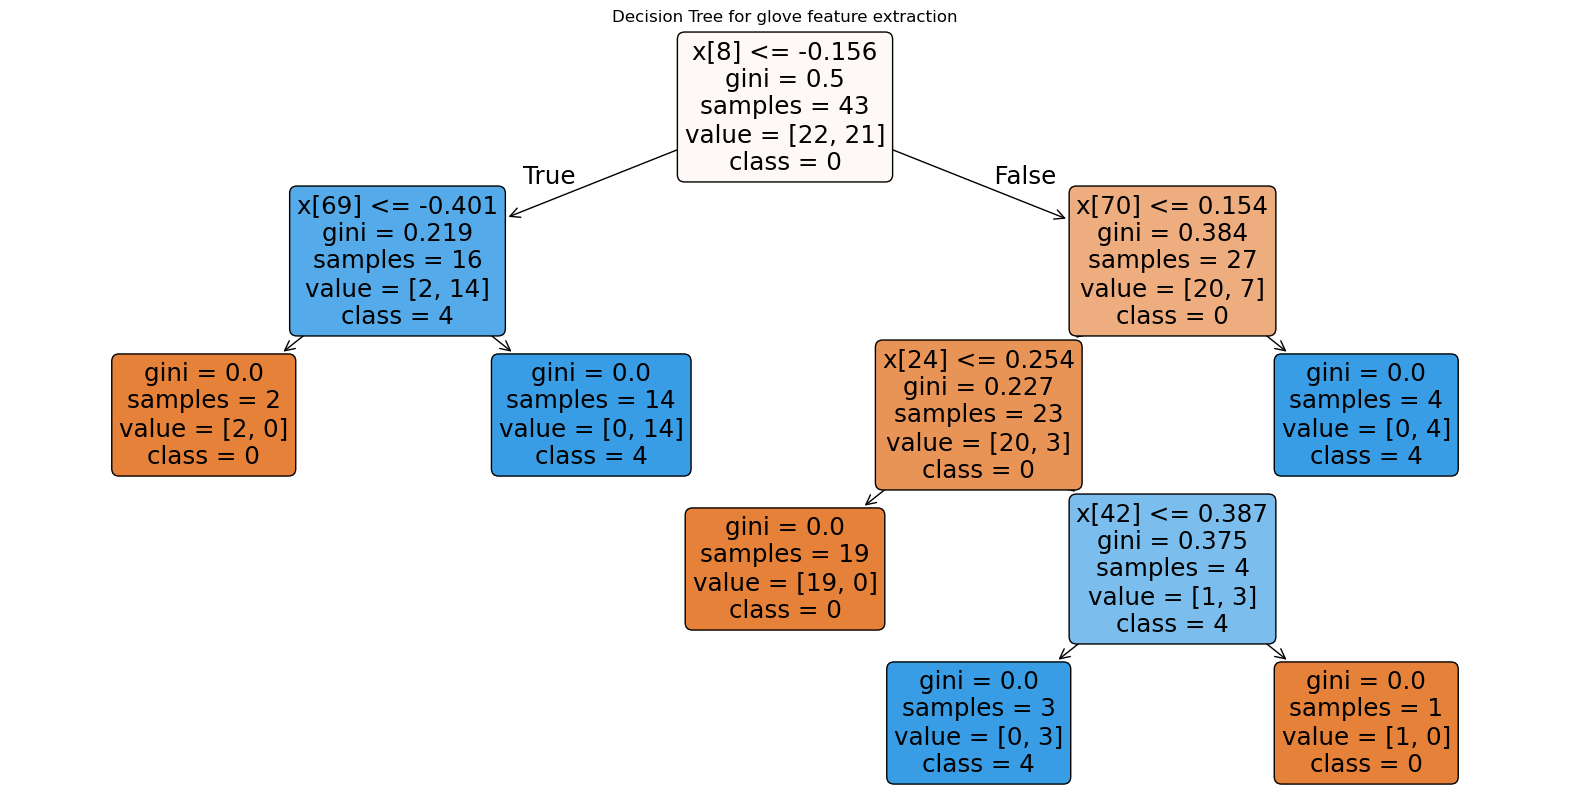


Rules used to predict sample 0:
decision node 0 : (X_test[0, 8] = -0.5013774633407593) <= -0.156451016664505
decision node 1 : (X_test[0, 69] = -0.0665464997291565) > -0.40060286223888397

The following samples [0, 1] share the node(s) [0 1 3] in the tree.
This is 27.272727272727273% of all nodes.

🔍 Processing feature extraction using: bert...
✅ bert - X_train_features shape: (43, 384)
✅ bert - X_test_features shape: (11, 384)
✅ bert - Accuracy: 0.6364


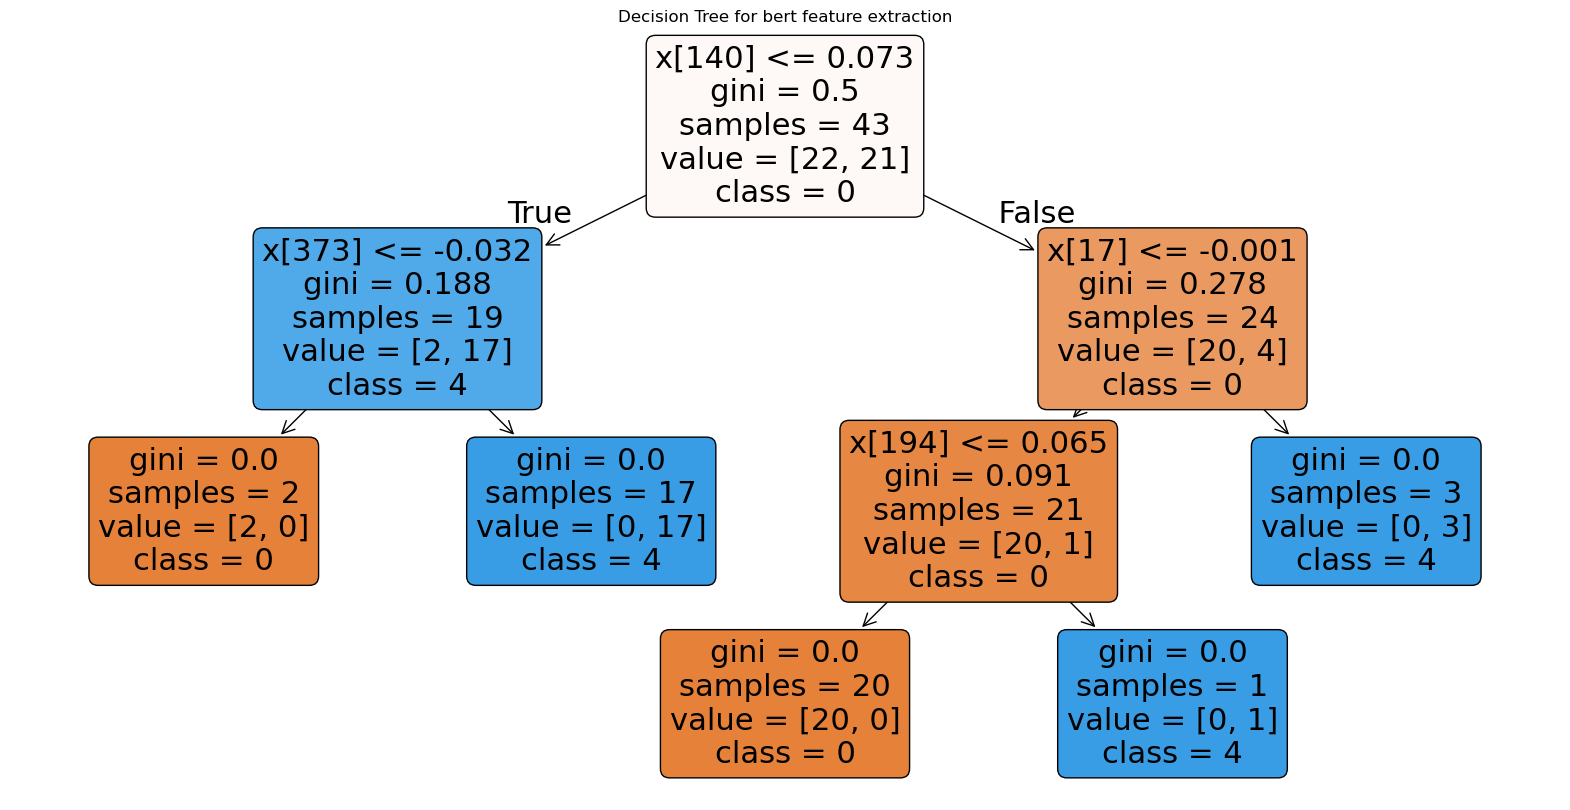


Rules used to predict sample 0:
decision node 0 : (X_test[0, 140] = 0.07774396240711212) > 0.07257398590445518
decision node 4 : (X_test[0, 17] = -0.042910102754831314) <= -0.00051780667854473
decision node 5 : (X_test[0, 194] = 0.05707799643278122) <= 0.06509778834879398

The following samples [0, 1] share the node(s) [0 4 5 6] in the tree.
This is 44.44444444444444% of all nodes.


In [47]:
# Training & Evaluation Loop
for method in feature_methods:
    print(f"\n🔍 Processing feature extraction using: {method}...")

    try:
        # Initialize FeatureBuilder
        feature_builder = FeatureBuilder(method=method, save_dir="data/processed")

        # Fit and transform training data
        X_train_features = feature_builder.fit_transform(X_train.tolist())
        print(f"✅ {method} - X_train_features shape: {X_train_features.shape}")

        # Transform test data (use saved models)
        X_test_features = feature_builder.transform(X_test.tolist())
        print(f"✅ {method} - X_test_features shape: {X_test_features.shape}")

        # Train Decision Tree Classifier
        clf = DecisionTreeClassifier(random_state=42)
        clf.fit(X_train_features, y_train)

        # Predictions
        y_pred = clf.predict(X_test_features)

        # Evaluate Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results[method] = accuracy

        print(f"✅ {method} - Accuracy: {accuracy:.4f}")
        
        # Accessing the tree structure
        n_nodes = clf.tree_.node_count
        children_left = clf.tree_.children_left
        children_right = clf.tree_.children_right
        feature = clf.tree_.feature
        threshold = clf.tree_.threshold
        values = clf.tree_.value

        # # Node depth calculation
        # node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
        # is_leaves = np.zeros(shape=n_nodes, dtype=bool)
        # stack = [(0, 0)]  # Start with the root node id (0) and its depth (0)
        
        # while len(stack) > 0:
        #     node_id, depth = stack.pop()
        #     node_depth[node_id] = depth

        #     is_split_node = children_left[node_id] != children_right[node_id]
        #     if is_split_node:
        #         stack.append((children_left[node_id], depth + 1))
        #         stack.append((children_right[node_id], depth + 1))
        #     else:
        #         is_leaves[node_id] = True

        # # Print tree structure
        # print("\nTree structure:")
        # for i in range(n_nodes):
        #     if is_leaves[i]:
        #         print(f"{node_depth[i] * '\t'}node={i} is a leaf node with value={np.around(values[i], 3)}.")
        #     else:
        #         print(f"{node_depth[i] * '\t'}node={i} is a split node with value={np.around(values[i], 3)}: "
        #               f"go to node {children_left[i]} if X[:, {feature[i]}] <= {threshold[i]} else to node {children_right[i]}.")

        # Plot the tree
        plt.figure(figsize=(20, 10))
        plot_tree(clf, filled=True, class_names=[str(label) for label in clf.classes_], rounded=True)
        plt.title(f"Decision Tree for {method} feature extraction")
        plt.show()

        # Decision path for a sample
        sample_id = 0  # You can change this for other samples
        node_indicator = clf.decision_path(X_test_features)
        leaf_id = clf.apply(X_test_features)
        
        print(f"\nRules used to predict sample {sample_id}:")
        node_index = node_indicator.indices[node_indicator.indptr[sample_id]: node_indicator.indptr[sample_id + 1]]
        
        for node_id in node_index:
            if leaf_id[sample_id] == node_id:
                continue

            threshold_sign = "<=" if X_test_features[sample_id, feature[node_id]] <= threshold[node_id] else ">"
            print(f"decision node {node_id} : (X_test[{sample_id}, {feature[node_id]}] = {X_test_features[sample_id, feature[node_id]]}) "
                  f"{threshold_sign} {threshold[node_id]}")

        # For a group of samples, find common nodes
        sample_ids = [0, 1]  # You can change this list
        common_nodes = node_indicator.toarray()[sample_ids].sum(axis=0) == len(sample_ids)
        common_node_id = np.arange(n_nodes)[common_nodes]

        print(f"\nThe following samples {sample_ids} share the node(s) {common_node_id} in the tree.")
        print(f"This is {100 * len(common_node_id) / n_nodes}% of all nodes.")

    except Exception as e:
        print(f"❌ Error with {method}: {e}")


In [28]:
# Display Final Results
print("\n📊 Final Model Performance:")
for method, acc in results.items():
    print(f" - {method}: {acc:.4f}")


📊 Final Model Performance:
 - tfidf: 0.8182
 - count: 0.8182
 - binary_count: 0.8182
 - word2vec: 0.7273
 - glove: 0.5455
 - bert: 0.6364
